In [8]:
import yfinance as yahooFinance
import datetime
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [28]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29089 sha256=124263984c85f4ea43f0188c8089bd34406d93cbf338c87a58697c9cdfc5686e
  Stored in directory: /root/.cache/pip/wheels/47/51/06/380dc516ea78621870b93ff65527c251afdfdc5fa9d7f4d248
Successfully built ta


In [29]:
from scipy.stats import t
from ta import momentum, trend

In [18]:
start = "2008-03-20"
end = '2023-10-16'

In [28]:
V = yahooFinance.download('V', start=start, end=end)['Adj Close']
MA = yahooFinance.download('MA', start=start, end=end)['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


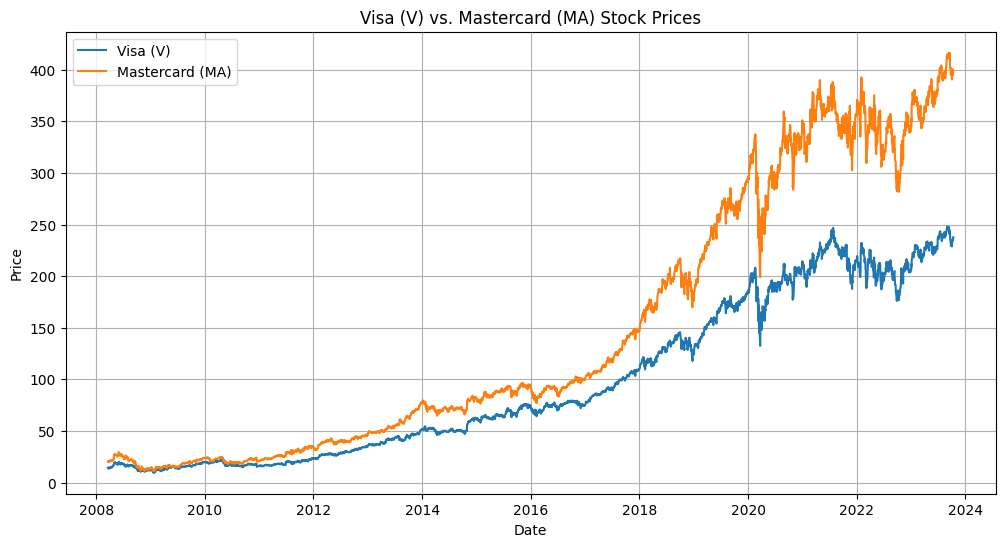

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(V, label='Visa (V)')
plt.plot(MA, label='Mastercard (MA)')
plt.title('Visa (V) vs. Mastercard (MA) Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

In [29]:
returns_V = V.pct_change().dropna()
returns_MA = MA.pct_change().dropna()

In [30]:
V_squared_returns = returns_V**2
MA_squared_returns = returns_MA**2

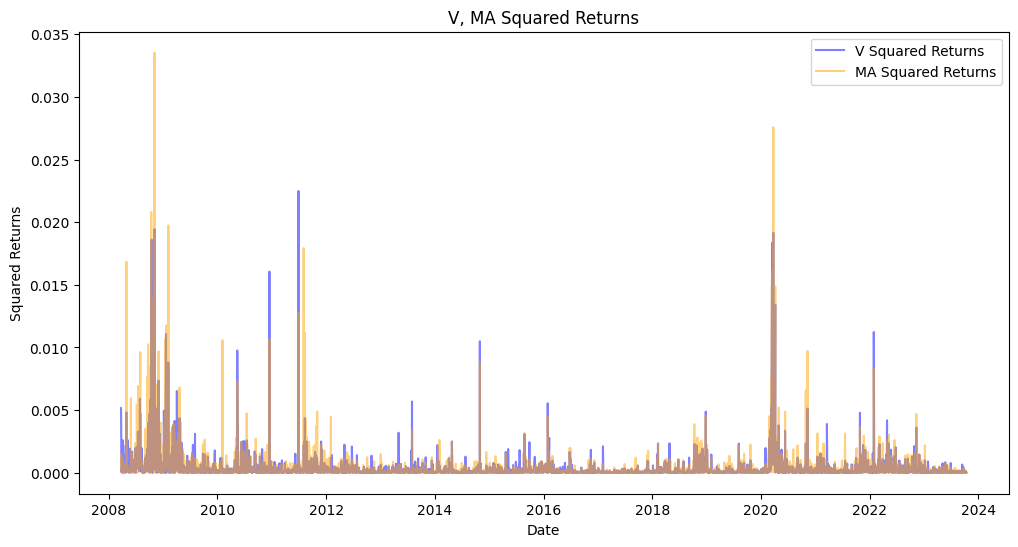

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(V_squared_returns, label='V Squared Returns',color='blue',alpha=0.5)
plt.plot( MA_squared_returns, label='MA Squared Returns',color='orange',alpha=0.5)
plt.title('V, MA Squared Returns')
plt.xlabel('Date')
plt.ylabel('Squared Returns')
plt.legend()
plt.show()

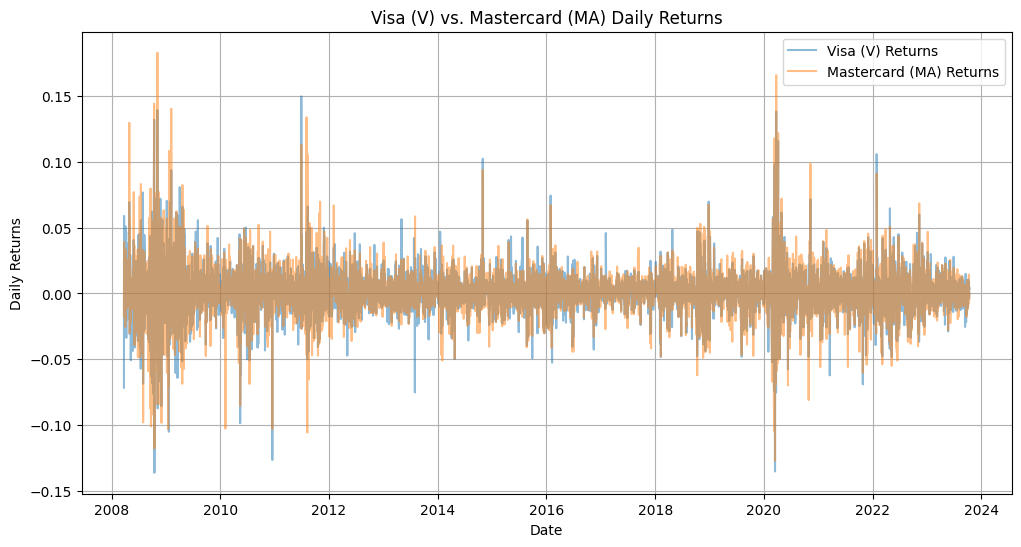

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(returns_V, label='Visa (V) Returns', alpha=0.5)
plt.plot(returns_MA, label='Mastercard (MA) Returns', alpha=0.5)
plt.title('Visa (V) vs. Mastercard (MA) Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.grid(True)
plt.legend()
plt.show()

In [11]:
volatility_V = returns_V.rolling(window=30).std()
volatility_MA = returns_MA.rolling(window=30).std()

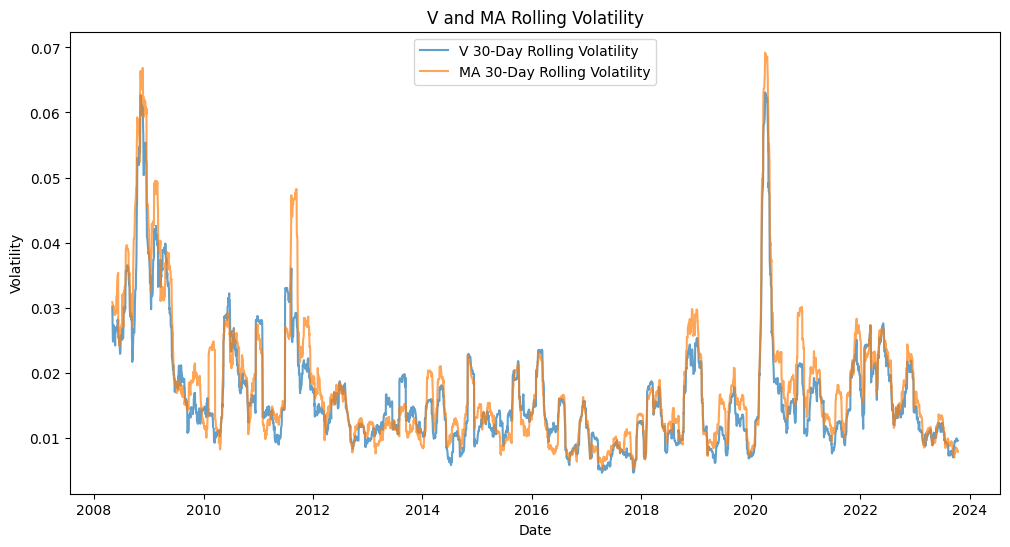

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(volatility_V.index, volatility_V, label='V 30-Day Rolling Volatility',alpha=0.7)
plt.plot(volatility_MA.index, volatility_MA, label='MA 30-Day Rolling Volatility',alpha=0.7)
plt.title('V and MA Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

In [17]:
positive_returns_V = returns_V[returns_V > 0]
negative_returns_V = returns_V[returns_V < 0]
positive_returns_MA = returns_MA[returns_MA > 0]
negative_returns_MA = returns_MA[returns_MA < 0]

mu1 = returns_V.mean()
sigma1 = returns_V.std()
simulated_returns1 = np.random.normal(mu1, sigma1, len(V))

mu2 = returns_MA.mean()
sigma2 = returns_MA.std()
simulated_returns2 = np.random.normal(mu2, sigma2, len(MA))

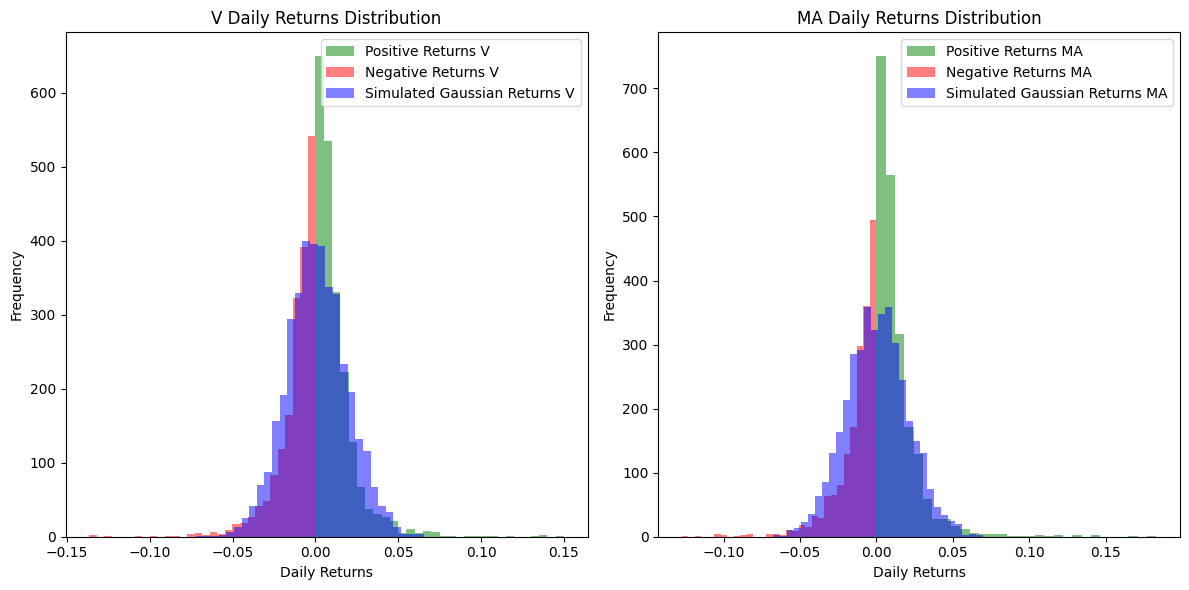

In [23]:
# Create a figure with 2 subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot 'V' Returns
axes[0].hist(positive_returns_V, bins=30, alpha=0.5, color='green', label='Positive Returns V')
axes[0].hist(negative_returns_V, bins=30, alpha=0.5, color='red', label='Negative Returns V')
axes[0].hist(simulated_returns1, bins=30, alpha=0.5, color='blue', label='Simulated Gaussian Returns V')
axes[0].set_title('V Daily Returns Distribution')
axes[0].set_xlabel('Daily Returns')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Plot 'MA' Returns
axes[1].hist(positive_returns_MA, bins=30, alpha=0.5, color='green', label='Positive Returns MA')
axes[1].hist(negative_returns_MA, bins=30, alpha=0.5, color='red', label='Negative Returns MA')
axes[1].hist(simulated_returns2, bins=30, alpha=0.5, color='blue', label='Simulated Gaussian Returns MA')
axes[1].set_title('MA Daily Returns Distribution')
axes[1].set_xlabel('Daily Returns')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [34]:
from ta import add_all_ta_features
from ta.momentum import RSIIndicator
from ta.trend import MACD

In [19]:
V1 = yahooFinance.download('V', start=start, end=end)
MA1 = yahooFinance.download('MA', start=start, end=end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [27]:
V1['Daily_Return'] = V1['Adj Close'].pct_change().dropna()
MA1['Daily_Return'] = MA1['Adj Close'].pct_change().dropna()

#risk-free rate (Treasury bill, 3Y)
risk_free_rate = 0.048

V1['Excess_Return'] = V1['Daily_Return'] - (risk_free_rate / 252)  #252 trading days year
MA1['Excess_Return'] = MA1['Daily_Return'] - (risk_free_rate / 252)

V1_sharpe_ratio = V1['Excess_Return'].mean() / V1['Excess_Return'].std()
MA1_sharpe_ratio = MA1['Excess_Return'].mean() / MA1['Excess_Return'].std()

print("Visa Sharpe Ratio:", V1_sharpe_ratio)
print("Mastercard Sharpe Ratio:", MA1_sharpe_ratio)

Visa Sharpe Ratio: 0.0375739644720302
Mastercard Sharpe Ratio: 0.03808627444713857


In [41]:
V1['RSI'] = RSIIndicator(V1['Adj Close']).rsi()
MA1['RSI'] = RSIIndicator(MA1['Adj Close']).rsi()
V1['MACD'] = MACD(V1['Adj Close']).macd()
MA1['MACD'] = MACD(MA1['Adj Close']).macd()

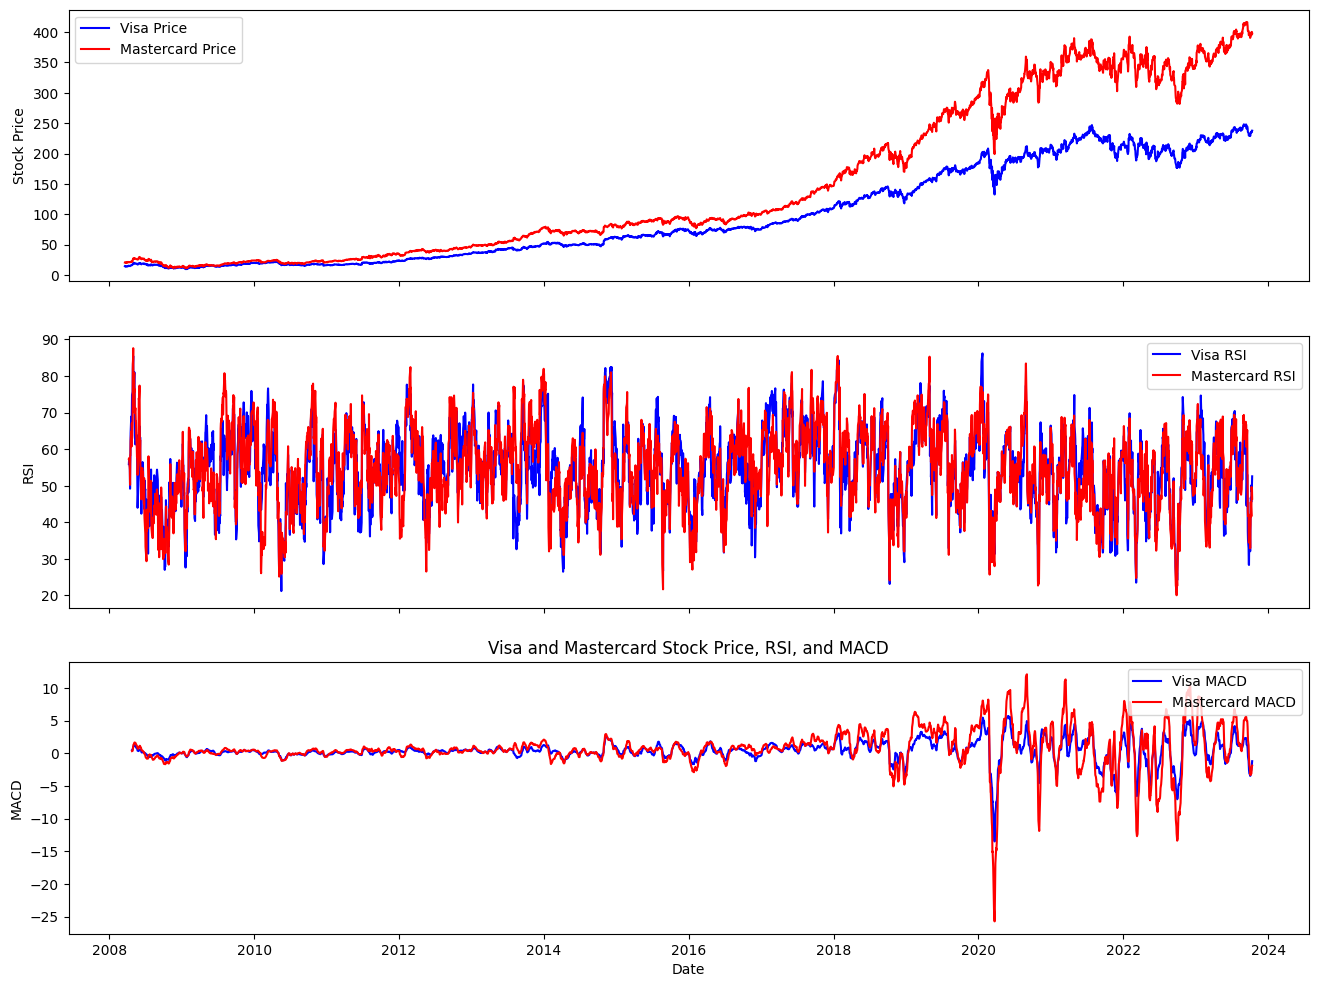

In [43]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 12), sharex=True)

ax1.plot(V1.index, V1['Adj Close'], label='Visa Price', color='blue')
ax1.plot(MA1.index, MA1['Adj Close'], label='Mastercard Price', color='red')
ax1.set_ylabel('Stock Price')
ax1.legend(loc='upper left')

ax2.plot(V1.index, V1['RSI'], label='Visa RSI', color='blue')
ax2.plot(MA1.index, MA1['RSI'], label='Mastercard RSI', color='red')
ax2.set_ylabel('RSI')
ax2.legend(loc='upper right')

ax3.plot(V1.index, V1['MACD'], label='Visa MACD', color='blue')
ax3.plot(MA1.index, MA1['MACD'], label='Mastercard MACD', color='red')
ax3.set_xlabel('Date')
ax3.set_ylabel('MACD')
ax3.legend(loc='upper right')

plt.title('Visa and Mastercard Stock Price, RSI, and MACD')
plt.show()

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
Roic = pd.read_excel(r'/content/gdrive/My Drive/Colab Notebooks/MA_V_Roics.xlsx')

In [5]:
display(pd.DataFrame(Roic))

,date,MA_Roic,V_Roic
0,6/30/2023,0.4361,0.2747
1,3/31/2023,0.4289,0.2712
2,12/31/2022,0.4759,0.2694
3,9/30/2022,0.4606,0.2709
4,6/30/2022,0.4495,0.2546
...,...,...,...
60,6/30/2008,0.3063,0.0891
61,3/31/2008,0.3230,0.0751
62,12/31/2007,0.3655,0.0715
63,9/30/2007,0.3445,0.6127


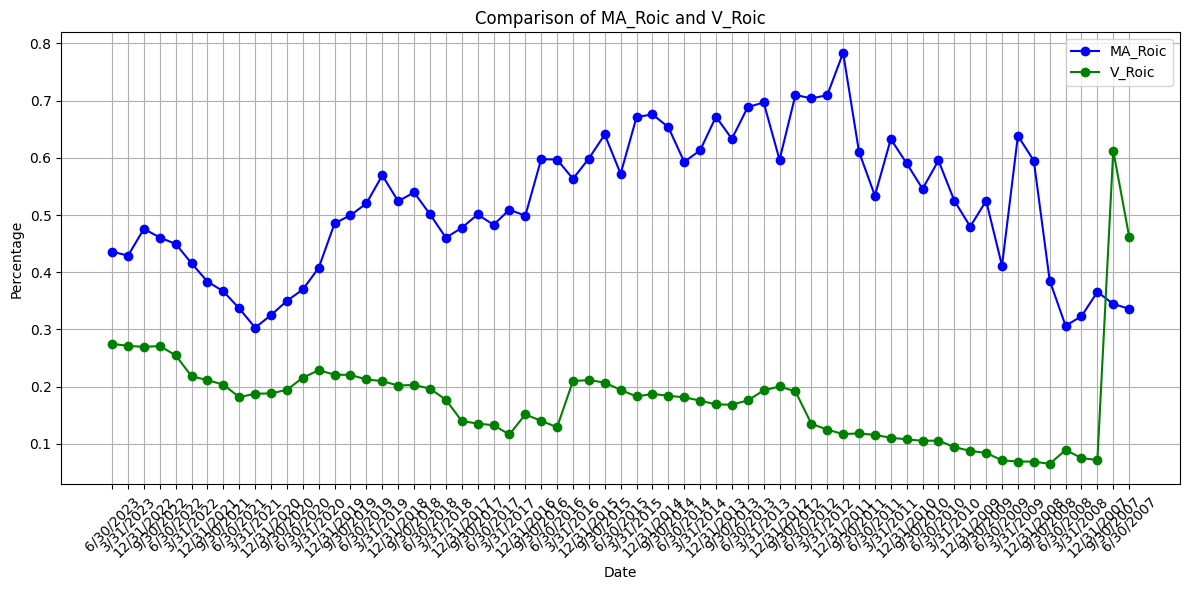

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(Roic['date'], Roic['MA_Roic'], label='MA_Roic', marker='o', linestyle='-', color='b')
plt.plot(Roic['date'], Roic['V_Roic'], label='V_Roic', marker='o', linestyle='-', color='g')

plt.title('Comparison of MA_Roic and V_Roic')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
ma_roic_std = Roic['MA_Roic'].std()
v_roic_std = Roic['V_Roic'].std()

ma_roic_mean = Roic['MA_Roic'].mean()
v_roic_mean = Roic['V_Roic'].mean()

last_10_years = Roic.head(120)  #data is sorted by date

last_10_years_ma_roic_mean = last_10_years['MA_Roic'].mean()
last_10_years_v_roic_mean = last_10_years['V_Roic'].mean()

last_5_years = Roic.head(60)  #data is sorted by date

last_5_years_ma_roic_mean = last_5_years['MA_Roic'].mean()
last_5_years_v_roic_mean = last_5_years['V_Roic'].mean()

In [12]:
print("Standard Deviation (MA_Roic):", ma_roic_std*100)
print("Standard Deviation (V_Roic):", v_roic_std*100)
print("Mean (MA_Roic):", ma_roic_mean*100)
print("Mean (V_Roic):", v_roic_mean*100)
print("Mean of Last 10 Years (MA_Roic):", last_10_years_ma_roic_mean*100)
print("Mean of Last 10 Years (V_Roic):", last_10_years_v_roic_mean*100)
print("Mean of Last 5 Years (MA_Roic):", last_5_years_ma_roic_mean*100)
print("Mean of Last 5 Years (V_Roic):", last_5_years_v_roic_mean*100)

Standard Deviation (MA_Roic): 12.014948101619723
Standard Deviation (V_Roic): 8.676509276267378
Mean (MA_Roic): 51.98692307692308
Mean (V_Roic): 17.65153846153846
Mean of Last 10 Years (MA_Roic): 51.98692307692308
Mean of Last 10 Years (V_Roic): 17.65153846153846
Mean of Last 5 Years (MA_Roic): 53.527
Mean of Last 5 Years (V_Roic): 16.937999999999995


**"The Sharpe Ratio of ROIC"**

In [16]:
print("V Sharpe Ratio (10Y):", last_10_years_v_roic_mean / v_roic_std)
print("MA Sharpe Ratio (10Y):", last_10_years_ma_roic_mean / ma_roic_std)

print("V Sharpe Ratio (5Y):", last_5_years_v_roic_mean / v_roic_std)
print("MA Sharpe Ratio (5Y):", last_5_years_ma_roic_mean / ma_roic_std)

print("V Sharpe Ratio :", v_roic_mean / v_roic_std)
print("MA Sharpe Ratio :", ma_roic_mean / ma_roic_std)

V Sharpe Ratio (10Y): 2.034405531014672
MA Sharpe Ratio (10Y): 4.32685373563243
V Sharpe Ratio (5Y): 1.95216756655007
MA Sharpe Ratio (5Y): 4.455033808492613
V Sharpe Ratio : 2.034405531014672
MA Sharpe Ratio : 4.32685373563243


In [38]:
from google.colab import drive

In [41]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [45]:
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [46]:
V_balance_sheet = pd.read_excel(r'/content/gdrive/My Drive/Colab Notebooks/Visa_balance_sheet.xlsx')
V_cash_flow = pd.read_excel(r'/content/gdrive/My Drive/Colab Notebooks/Visa_cash_flow_statement.xlsx')
V_income_statement = pd.read_excel(r'/content/gdrive/My Drive/Colab Notebooks/Visa_income_statement.xlsx')

MA_balance_sheet = pd.read_excel(r'/content/gdrive/My Drive/Colab Notebooks/Mastercard_balance_sheet.xlsx')
MA_cash_flow = pd.read_excel(r'/content/gdrive/My Drive/Colab Notebooks/Mastercard_cash_flow_statement.xlsx')
MA_income_statement = pd.read_excel(r'/content/gdrive/My Drive/Colab Notebooks/Mastercard_income_statement.xlsx')

In [47]:
display(pd.DataFrame(V_balance_sheet))

,Unnamed: 0,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013
0,Assets,86755,85387,81929,80426,74781,71655,67154,63370,54977,38884,36248
1,Assets Current,28657,27859,25906,26280,22319,20107,17287,14689,25473,9864,7765
2,Cash and Cash Equivalents,13842,13334,14720,15032,8768,8289,8138,5824,12837,2085,2121
3,Short Term Investment,2752,2785,1201,3009,3902,3461,3413,3697,8508,2495,1969
4,Accounts Receivable,2122,2113,2168,1746,1661,1405,1281,1120,922,900,840
5,Receivables Net Current,4064,4240,3956,3342,4934,4528,2899,2453,1365,1400,1748
6,Inventory,4355,4296,4695,3616,3912,3282,2542,2450,2349,3684,1692
7,Prepaid Expense and Other Current Assets,2167,1802,1267,729,580,456,504,555,353,307,187
8,Non Current Assets,58098,57528,56023,54146,52462,51548,49867,48681,29504,29020,28483
9,Property Plant And Equipment Net,3359,3236,2908,2713,2739,2437,2238,2201,1884,1861,1746


In [48]:
display(pd.DataFrame(MA_balance_sheet))

,Unnamed: 0,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013
0,Assets,38936,38724,37669,33584,29236,24860,21329,18675,16269,15329,14242
1,Assets Current,16420,16606,16949,19113,16902,16171,13797,13228,10985,10997,10950
2,Cash and Cash Equivalents,6566,7008,7421,10113,6988,6682,5933,6721,5747,5137,3599
3,Short Term Investment,402,400,473,483,688,1696,1849,1614,991,1168,2696
4,Accounts Receivable,3511,3425,3006,2646,2514,2276,2013,1416,1079,1109,966
5,Receivables Net Current,3511,3425,4325,4352,5509,4728,3344,2509,2147,2161,2317
6,Inventory,2204,2157,2459,2282,1954,1513,1631,1534,1436,1790,1867
7,Prepaid Expense and Other Current Assets,2501,2346,2271,1883,1763,1432,1204,850,663,671,471
8,Non Current Assets,22516,22118,20720,14471,12334,8689,7532,5447,5284,4332,3292
9,Property Plant And Equipment Net,2006,2006,1907,1902,1828,1296,829,733,675,615,526


In [49]:
share_outstanding_V = V_balance_sheet.iloc[38, 1:]
share_outstanding_V = pd.to_numeric(share_outstanding_V, errors='coerce')

share_outstanding_MA = MA_balance_sheet.iloc[38, 1:]
share_outstanding_MA = pd.to_numeric(share_outstanding_MA, errors='coerce')

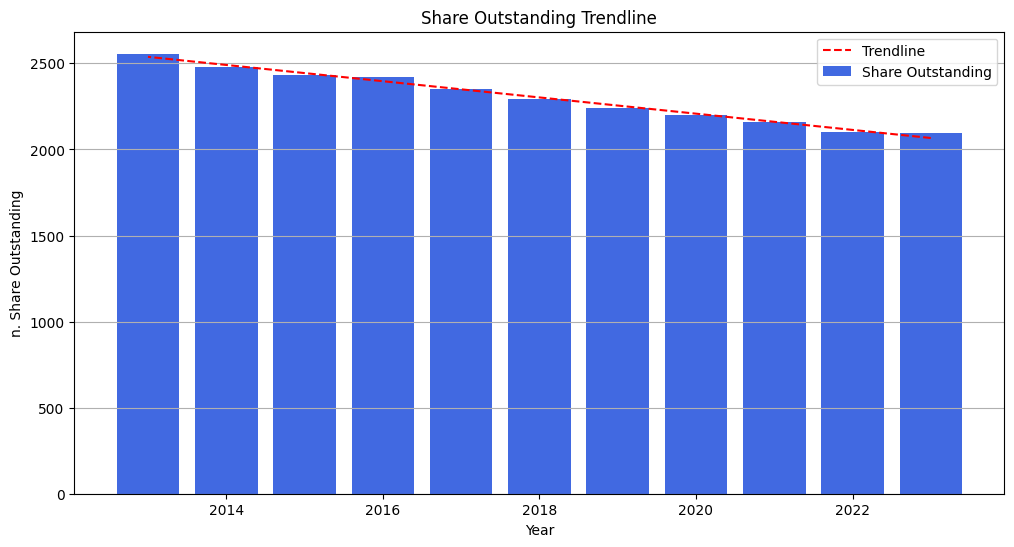

In [55]:
plt.figure(figsize=(12, 6))
plt.bar(V_balance_sheet.columns[1:], share_outstanding_V, color='royalblue', label='Share Outstanding')


#linear regression to the data
X = np.array(range(len(share_outstanding_V))).reshape(-1, 1)
y = share_outstanding_V.values
reg = LinearRegression().fit(X, y)
trendline = reg.predict(X)


plt.plot(V_balance_sheet.columns[1:], trendline, color='red', linestyle='--', label='Trendline')

plt.title('Share Outstanding Visa')
plt.xlabel('Year')
plt.ylabel('n. Share Outstanding')
plt.grid(axis='y')
plt.legend()
plt.show()

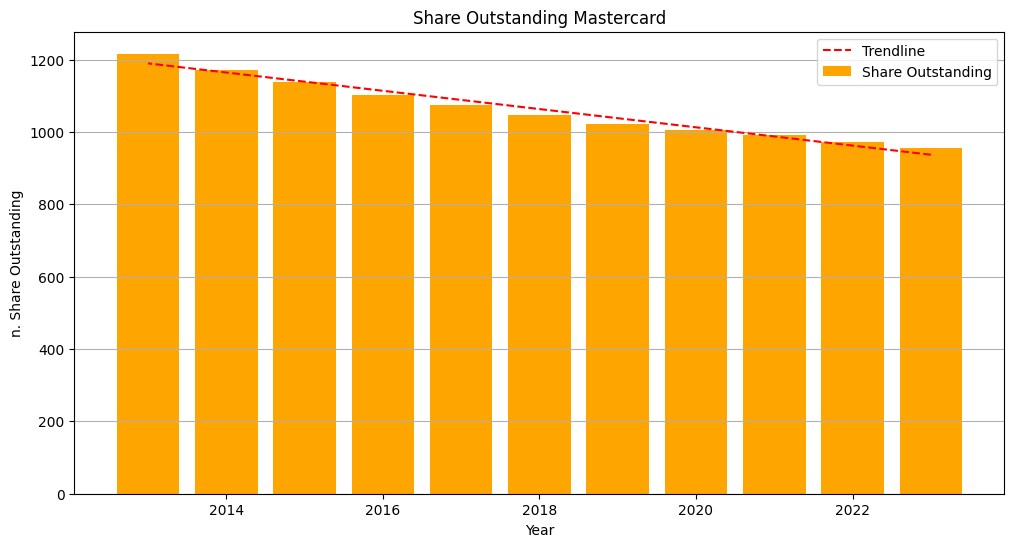

In [57]:
plt.figure(figsize=(12, 6))
plt.bar(MA_balance_sheet.columns[1:], share_outstanding_MA, color='orange', label='Share Outstanding')


#linear regression to the data
X = np.array(range(len(share_outstanding_MA))).reshape(-1, 1)
y = share_outstanding_MA.values
reg = LinearRegression().fit(X, y)
trendline = reg.predict(X)


plt.plot(MA_balance_sheet.columns[1:], trendline, color='red', linestyle='--', label='Trendline')

plt.title('Share Outstanding Mastercard')
plt.xlabel('Year')
plt.ylabel('n. Share Outstanding')
plt.grid(axis='y')
plt.legend()
plt.show()

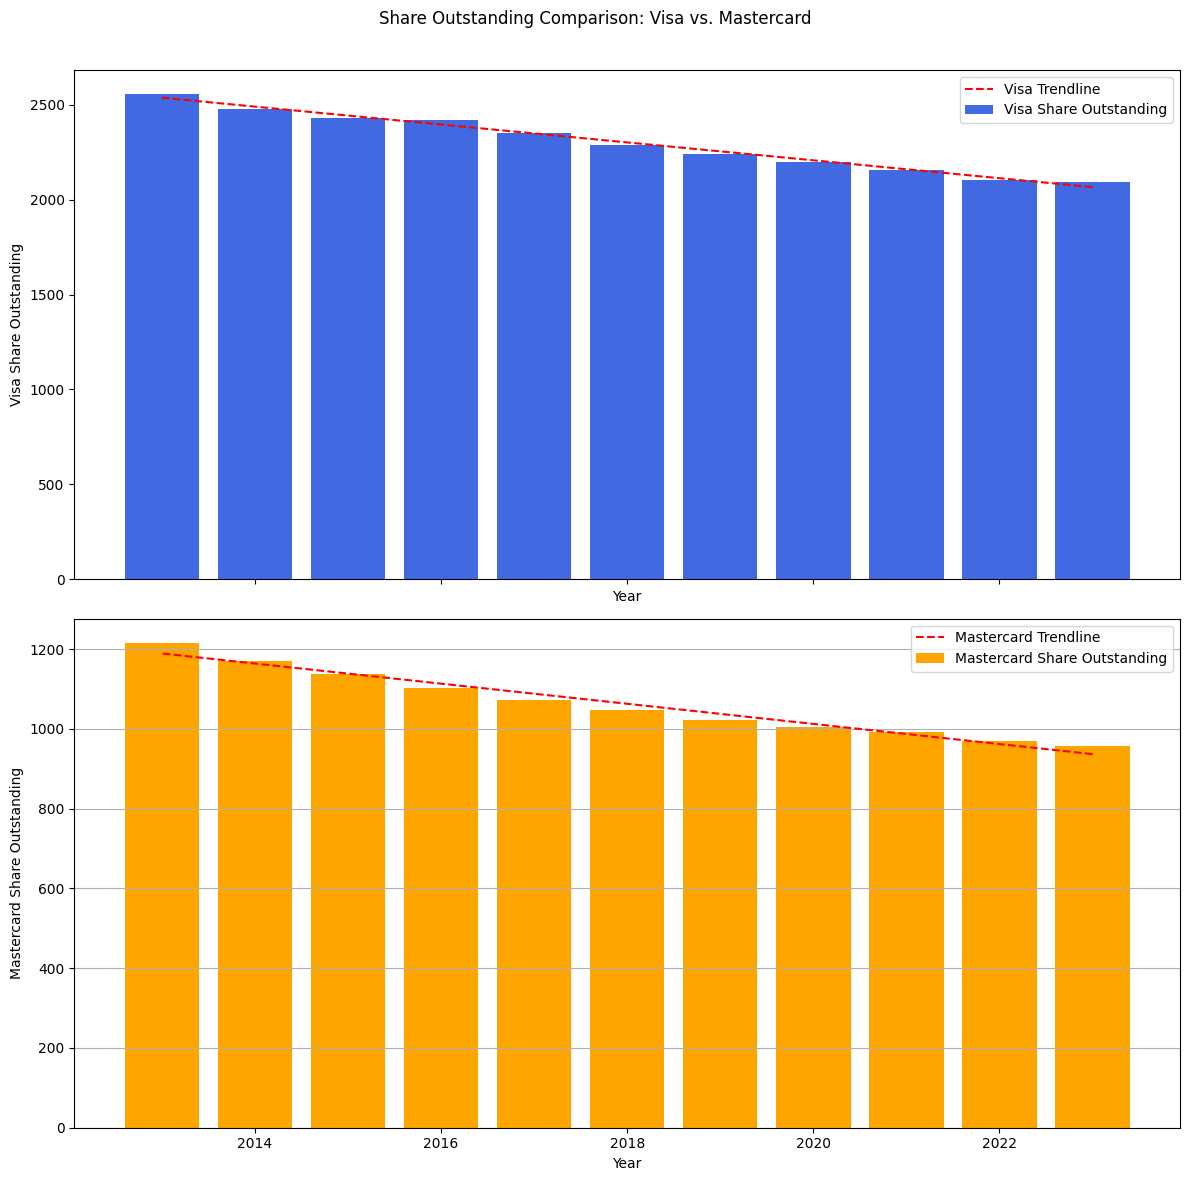

In [68]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Plot Visa's share outstanding data
ax1.bar(V_balance_sheet.columns[1:], share_outstanding_V, color='royalblue', label='Visa Share Outstanding')
ax1.set_xlabel('Year')
ax1.set_ylabel('Visa Share Outstanding')
ax1.legend(loc='upper left')

# Linear regression for Visa
X = np.array(range(len(share_outstanding_V))).reshape(-1, 1)
y = share_outstanding_V
reg = LinearRegression().fit(X, y)
trendline_V = reg.predict(X)
ax1.plot(V_balance_sheet.columns[1:], trendline_V, color='red', linestyle='--', label='Visa Trendline')
ax1.legend(loc='upper right')

# Plot Mastercard's share outstanding data
ax2.bar(MA_balance_sheet.columns[1:], share_outstanding_MA, color='orange', label='Mastercard Share Outstanding')
ax2.set_xlabel('Year')
ax2.set_ylabel('Mastercard Share Outstanding')
ax2.legend(loc='upper left')

# Linear regression for Mastercard
X = np.array(range(len(share_outstanding_MA))).reshape(-1, 1)
y = share_outstanding_MA
reg = LinearRegression().fit(X, y)
trendline_MA = reg.predict(X)
ax2.plot(MA_balance_sheet.columns[1:], trendline_MA, color='red', linestyle='--', label='Mastercard Trendline')
ax2.legend(loc='upper right')

plt.suptitle('Share Outstanding Comparison: Visa vs. Mastercard')
plt.grid(axis='y')
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust subplot positions
plt.show()


In [88]:
initial_share_outstanding_V = share_outstanding_V.iloc[-1]  #  the share_outstanding series objects, not lists so cannot  access by index [0].
final_share_outstanding_V = share_outstanding_V.iloc[0]  # but with .iloc[0]      ##[0] =2023, [-1] = 2013
percentage_decrease_V = ((final_share_outstanding_V - initial_share_outstanding_V) / initial_share_outstanding_V) * 100

initial_share_outstanding_MA = share_outstanding_MA.iloc[-1]
final_share_outstanding_MA = share_outstanding_MA.iloc[0]
percentage_decrease_MA = ((final_share_outstanding_MA - initial_share_outstanding_MA) / initial_share_outstanding_MA) * 100

print(f'Percentage Decrease in Visa Share Outstanding: {percentage_decrease_V:.2f}%')
print(f'Percentage Decrease in Mastercard Share Outstanding: {percentage_decrease_MA:.2f}%')


Percentage Decrease in Visa Share Outstanding: -18.11%
Percentage Decrease in Mastercard Share Outstanding: -21.38%


In [64]:
cash_equivalents_V = V_balance_sheet.iloc[2, 1:]
net_debt_V = V_balance_sheet.iloc[32, 1:]

cash_equivalents_MA = MA_balance_sheet.iloc[2, 1:]
net_debt_MA = MA_balance_sheet.iloc[33, 1:]

cash_equivalents_V = pd.to_numeric(cash_equivalents_V, errors='coerce')
net_debt_V = pd.to_numeric(net_debt_V, errors='coerce')

cash_equivalents_MA = pd.to_numeric(cash_equivalents_MA, errors='coerce')
net_debt_MA = pd.to_numeric(net_debt_MA, errors='coerce')

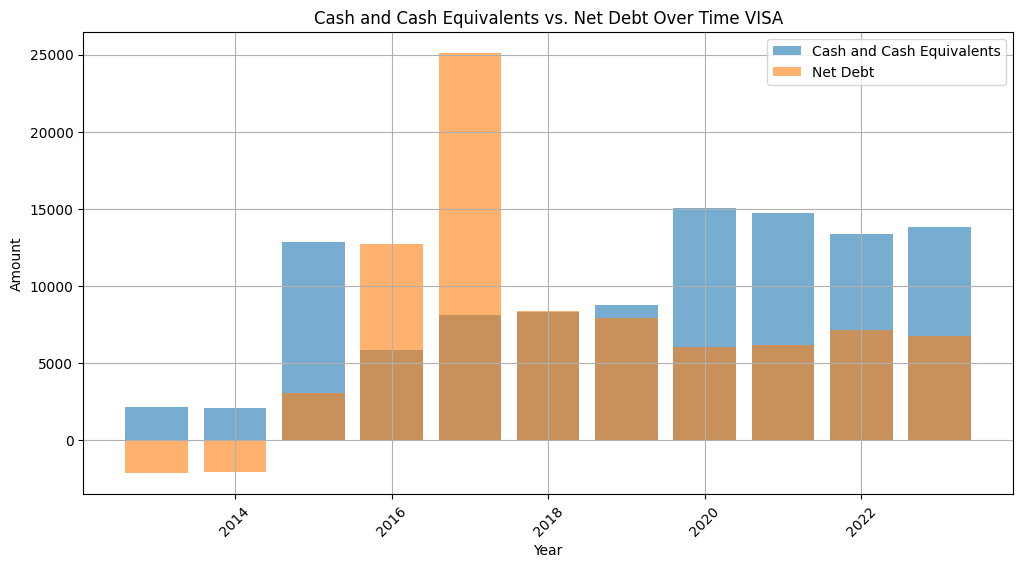

In [65]:
plt.figure(figsize=(12, 6))
plt.bar(V_balance_sheet.columns[1:], cash_equivalents_V, label='Cash and Cash Equivalents', alpha=0.6)
plt.bar(V_balance_sheet.columns[1:], net_debt_V, label='Net Debt', alpha=0.6)
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Cash and Cash Equivalents vs. Net Debt Over Time VISA')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()

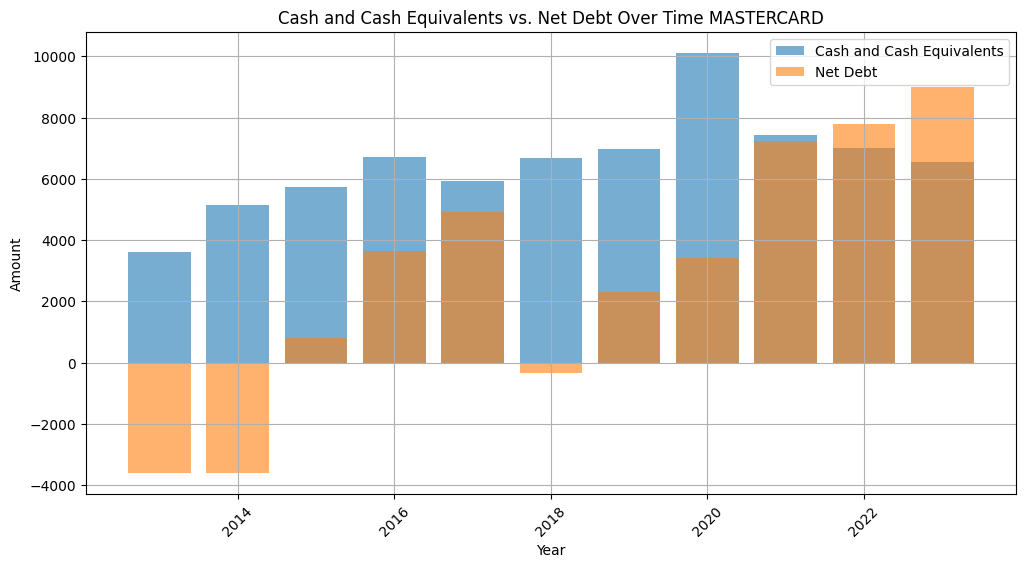

In [66]:
plt.figure(figsize=(12, 6))
plt.bar(MA_balance_sheet.columns[1:], cash_equivalents_MA, label='Cash and Cash Equivalents', alpha=0.6)
plt.bar(MA_balance_sheet.columns[1:], net_debt_MA, label='Net Debt', alpha=0.6)
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Cash and Cash Equivalents vs. Net Debt Over Time MASTERCARD')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()

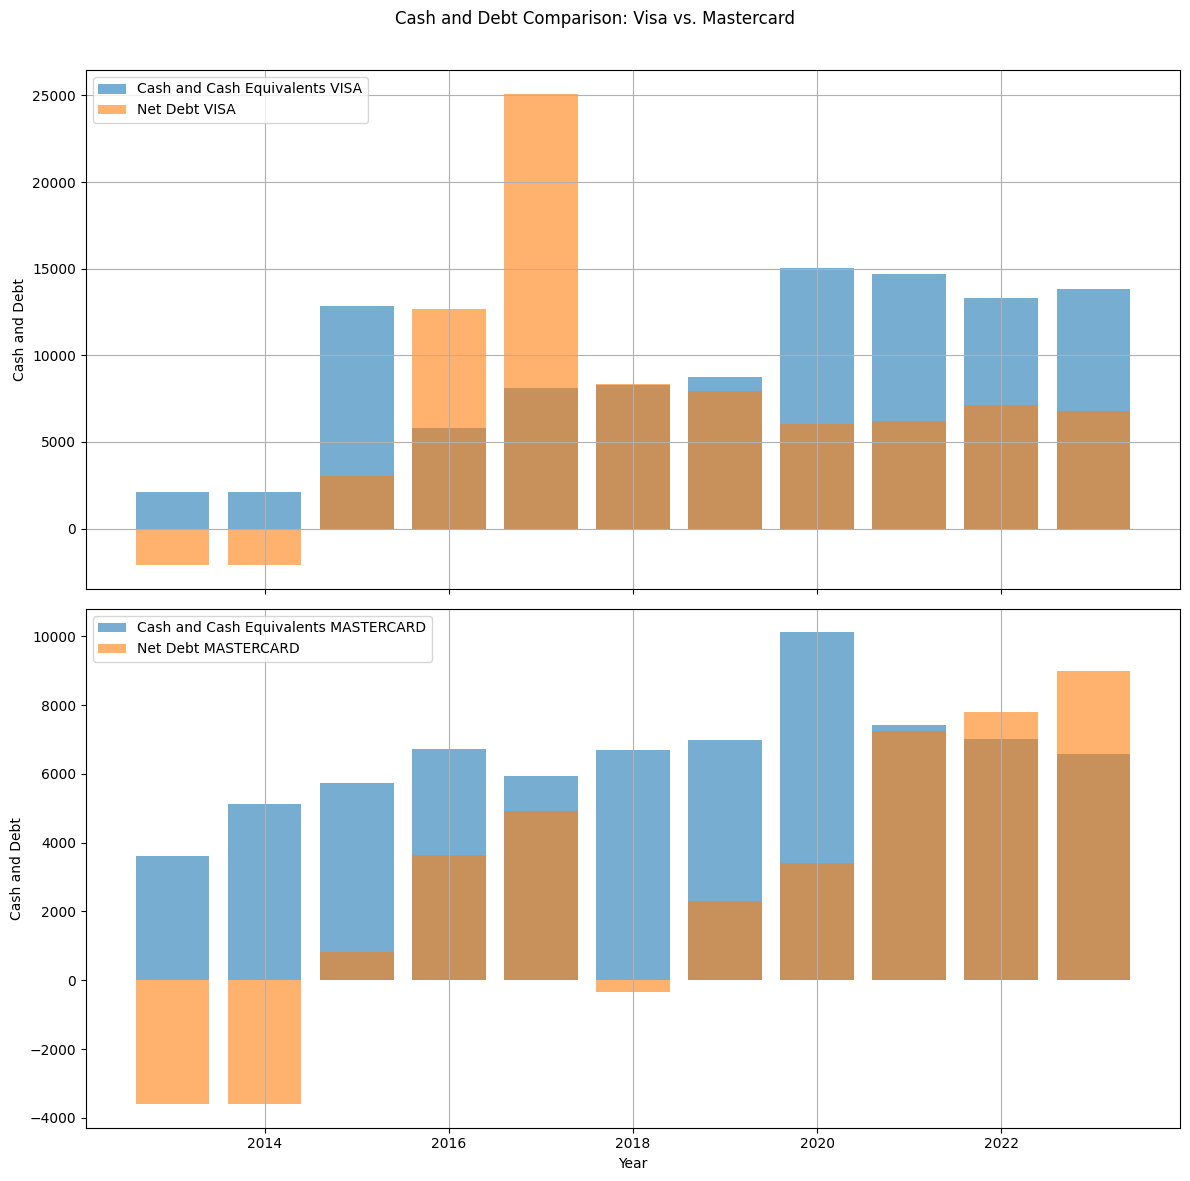

In [71]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

ax1.bar(V_balance_sheet.columns[1:], cash_equivalents_V, label='Cash and Cash Equivalents VISA', alpha=0.6)
ax1.bar(V_balance_sheet.columns[1:], net_debt_V, label='Net Debt VISA', alpha=0.6)
ax1.set_ylabel('Cash and Debt')
ax1.legend(loc='upper left')
ax1.grid(True)

ax2.bar(MA_balance_sheet.columns[1:], cash_equivalents_MA, label='Cash and Cash Equivalents MASTERCARD', alpha=0.6)
ax2.bar(MA_balance_sheet.columns[1:], net_debt_MA, label='Net Debt MASTERCARD', alpha=0.6)
ax2.set_xlabel('Year')
ax2.set_ylabel('Cash and Debt')
ax2.legend(loc='upper left')
ax2.grid(True)


plt.suptitle('Cash and Debt Comparison: Visa vs. Mastercard')
plt.grid(axis='y')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


In [72]:
display(pd.DataFrame(V_cash_flow))

,Unnamed: 0,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013
0,Net Income/Loss,15177,12311,10866,12080,10301,6699,5991,6328,5438,4980
1,Deferred Income Tax Expense Benefit,-336,871,307,214,-1287,1698,-778,208,-580,1527
2,Amortization Of Intangible Assets,90,83,80,60,55,56,50,63,66,69
3,Depreciation,890,804,767,656,613,556,502,494,435,397
4,Share Based Compensation,602,542,416,407,327,235,221,187,172,179
5,Changes in Working Capital Components,-8656,-6702,-8398,-6303,-2657,-4580,-3526,-3545,-1252,-6361
6,Increase Decrease In Accounts Payable,67,88,21,-24,3,-30,43,-13,-56,40
7,Increase Decrease In Accounts Receivable,56,-343,-43,-333,-70,-54,-65,-19,-53,-38
8,Net Cash Provided By Operating Activities,18788,15227,10440,12784,12713,9208,5574,6584,7205,3022
9,Capital Expenditures,1046,705,736,756,718,707,523,414,553,471


In [74]:
fcf_V = V_cash_flow.iloc[21, 1:]
fcf_V = pd.to_numeric(fcf_V, errors='coerce')

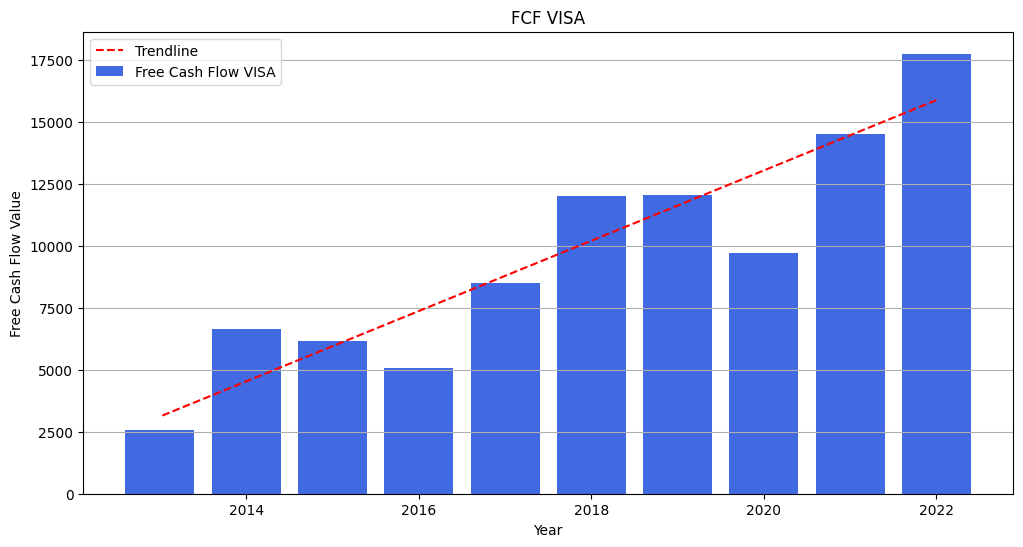

In [75]:
plt.figure(figsize=(12, 6))
plt.bar(V_cash_flow.columns[1:], fcf_V, color='royalblue', label='Free Cash Flow VISA')

X = np.array(range(len(fcf_V))).reshape(-1, 1)
y = fcf_V.values
reg = LinearRegression().fit(X, y)
trendline = reg.predict(X)


plt.plot(V_cash_flow.columns[1:], trendline, color='red', linestyle='--', label='Trendline')

plt.title('FCF VISA')
plt.xlabel('Year')
plt.ylabel('Free Cash Flow Value')
plt.grid(axis='y')
plt.legend()
plt.show()

In [90]:
capital_expenditures_V = V_cash_flow.iloc[9, 1:]
capital_expenditures_V = pd.to_numeric(capital_expenditures_V, errors='coerce')

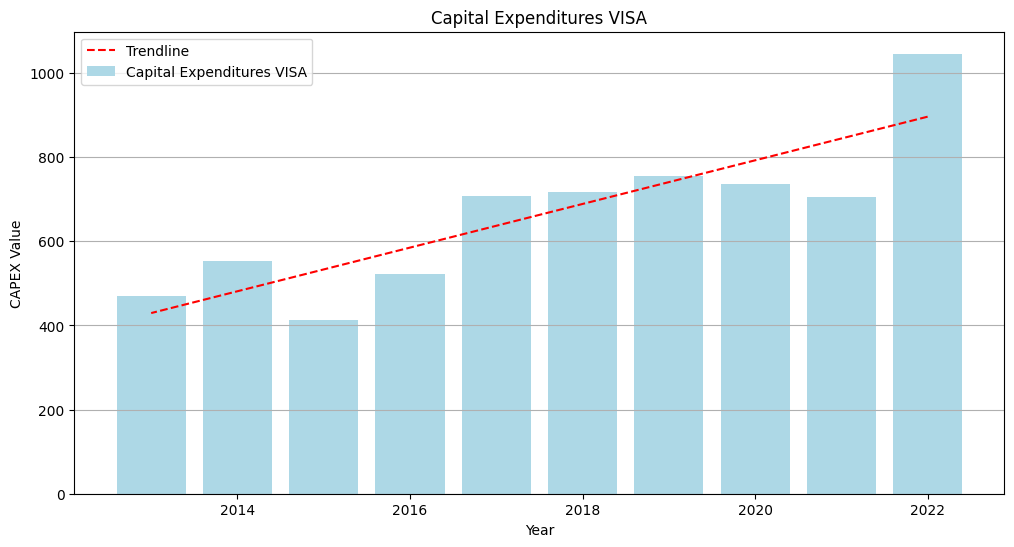

In [93]:
plt.figure(figsize=(12, 6))
plt.bar(V_cash_flow.columns[1:], capital_expenditures_V, color='lightblue', label='Capital Expenditures VISA')

X = np.array(range(len(capital_expenditures_V))).reshape(-1, 1)
y = capital_expenditures_V.values
reg = LinearRegression().fit(X, y)
trendline = reg.predict(X)

plt.plot(V_cash_flow.columns[1:], trendline, color='red', linestyle='--', label='Trendline')

plt.title('Capital Expenditures VISA')
plt.xlabel('Year')
plt.ylabel('CAPEX Value')
plt.grid(axis='y')
plt.legend()
plt.show()

In [73]:
display(pd.DataFrame(MA_cash_flow))

,Unnamed: 0,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013
0,Net Income/Loss,9930,8687,6411,8118,5859,3915,4059,3808,3617,3116
1,Deferred Income Tax Expense Benefit,-651,-69,73,-7,-244,86,-20,-16,-91,-119
2,Amortization Of Intangible Assets,414,424,303,285,250,252,221,235,214,166
3,Depreciation,750,726,580,522,459,437,373,366,321,258
4,Share Based Compensation,295,273,254,250,196,176,149,122,-15,63
5,Changes in Working Capital Components,-904,-916,-1150,-1698,-1313,-286,-867,-820,-1168,750
6,Increase Decrease In Accounts Payable,190,100,26,-42,101,290,145,49,61,-20
7,Increase Decrease In Accounts Receivable,-481,-7,1202,-690,-1395,-726,-348,-133,21,-236
8,Net Cash Provided By Operating Activities,11195,9463,7224,8183,6223,5555,4484,4043,3407,4135
9,Capital Expenditures,1097,814,708,728,504,423,382,342,334,299


In [79]:
fcf_MA = MA_cash_flow.iloc[23, 1:]
fcf_MA = pd.to_numeric(fcf_MA, errors='coerce')

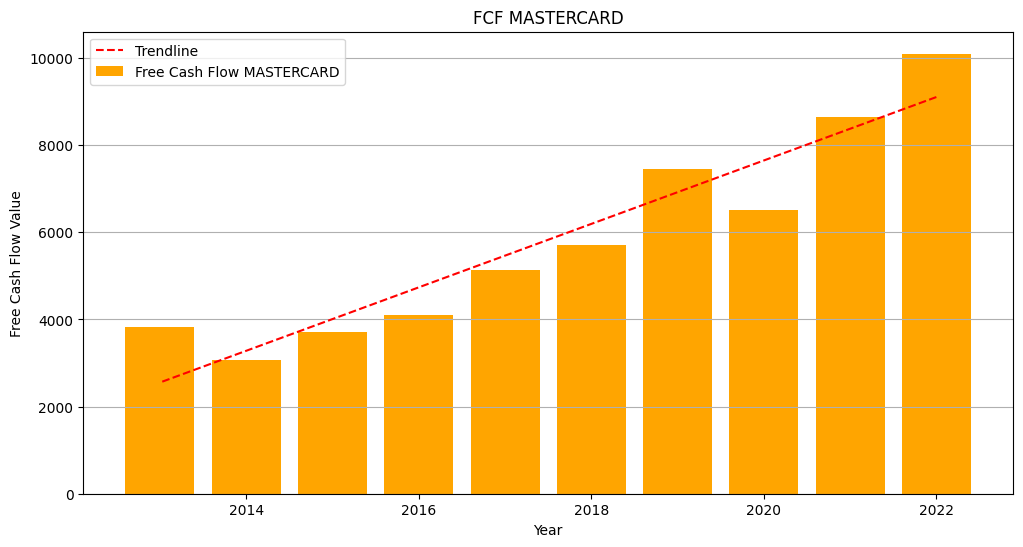

In [80]:
plt.figure(figsize=(12, 6))
plt.bar(MA_cash_flow.columns[1:], fcf_MA, color='orange', label='Free Cash Flow MASTERCARD')

X = np.array(range(len(fcf_MA))).reshape(-1, 1)
y = fcf_MA.values
reg = LinearRegression().fit(X, y)
trendline = reg.predict(X)


plt.plot(MA_cash_flow.columns[1:], trendline, color='red', linestyle='--', label='Trendline')

plt.title('FCF MASTERCARD')
plt.xlabel('Year')
plt.ylabel('Free Cash Flow Value')
plt.grid(axis='y')
plt.legend()
plt.show()

In [89]:
initial_fcf_V = fcf_V.iloc[-1]
final_fcf_V = fcf_V.iloc[0]
percentage_fcf_decrease_V = ((final_fcf_V - initial_fcf_V) / initial_fcf_V) * 100

initial_fcf_MA = fcf_MA.iloc[-1]
final_fcf_MA = fcf_MA.iloc[0]
percentage_fcf_decrease_MA = ((final_fcf_MA - initial_fcf_MA) / initial_fcf_MA) * 100

print(f'Percentage Increase in Visa FCF: {percentage_fcf_decrease_V:.2f}%')
print(f'Percentage Increase in Mastercard FCF: {percentage_fcf_decrease_MA:.2f}%')

Percentage Increase in Visa FCF: 595.49%
Percentage Increase in Mastercard FCF: 163.24%


In [91]:
capital_expenditures_MA = MA_cash_flow.iloc[9, 1:]
capital_expenditures_MA = pd.to_numeric(capital_expenditures_MA, errors='coerce')

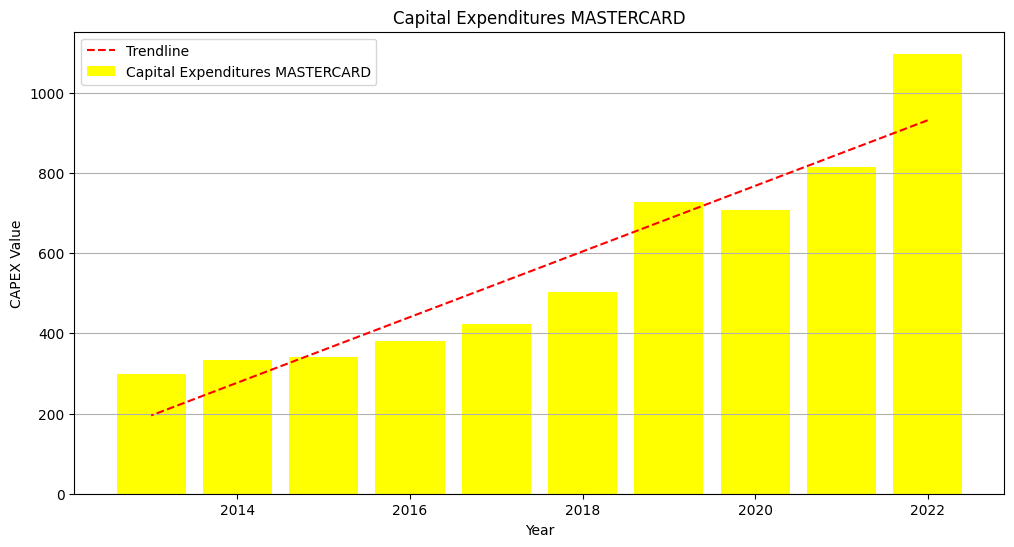

In [94]:
plt.figure(figsize=(12, 6))
plt.bar(MA_cash_flow.columns[1:], capital_expenditures_MA, color='yellow', label='Capital Expenditures MASTERCARD')

X = np.array(range(len(capital_expenditures_MA))).reshape(-1, 1)
y = capital_expenditures_MA.values
reg = LinearRegression().fit(X, y)
trendline = reg.predict(X)

plt.plot(MA_cash_flow.columns[1:], trendline, color='red', linestyle='--', label='Trendline')

plt.title('Capital Expenditures MASTERCARD')
plt.xlabel('Year')
plt.ylabel('CAPEX Value')
plt.grid(axis='y')
plt.legend()
plt.show()

In [95]:
initial_capex_V = capital_expenditures_V.iloc[-1]
final_capex_V = capital_expenditures_V.iloc[0]
percentage_capex_increase_V = ((final_capex_V - initial_capex_V) / initial_capex_V) * 100

initial_capex_MA = capital_expenditures_MA.iloc[-1]
final_capex_MA = capital_expenditures_MA.iloc[0]
percentage_capex_increase_MA = ((final_capex_MA - initial_capex_MA) / initial_capex_MA) * 100

print(f'Percentage Increase in Visa CAPEX: {percentage_capex_increase_V:.2f}%')
print(f'Percentage Increase in Mastercard CAPEX: {percentage_capex_increase_MA:.2f}%')

Percentage Increase in Visa CAPEX: 122.08%
Percentage Increase in Mastercard CAPEX: 266.89%


In [96]:
display(pd.DataFrame(V_income_statement))

,Unnamed: 0,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013
0,Revenue,30187.00,24105.00,21846.00,22977.00,20609.00,18358.00,15082.00,13880.00,12702.00,11778.00
1,Cost Of Revenue,5933.00,4970.00,4512.00,4165.00,3856.00,3248.00,2764.00,2553.00,2382.00,2400.00
2,Gross Profit,24254.00,19135.00,17334.00,18812.00,16753.00,15110.00,12318.00,11327.00,10320.00,9378.00
3,Gross Profit Margin %,80.35,79.39,79.35,81.88,81.29,82.31,81.68,81.61,81.25,79.63
4,Operating Expenses,4066.00,3328.00,3242.00,3411.00,3192.00,2947.00,2556.00,2249.00,2170.00,2136.00
5,Selling General And Administrative Expense,1788.00,1388.00,1504.00,1650.00,1591.00,1469.00,1185.00,883.00,835.00,863.00
6,Depreciation And Amortization,1951.00,804.00,767.00,656.00,613.00,556.00,502.00,494.00,435.00,397.00
7,Operating Income/Loss,19127.00,15804.00,14081.00,15001.00,12954.00,12144.00,7883.00,9064.00,7697.00,7239.00
8,Operating Margin %,63.37,65.57,64.46,65.29,62.86,66.16,52.27,65.31,60.60,61.47
9,Nonoperating Income Expense,-370.00,772.00,225.00,416.00,464.00,113.00,556.00,-69.00,27.00,18.00


In [98]:
revenue_V = V_income_statement.iloc[0, 1:]
cost_of_revenue_V = V_income_statement.iloc[1, 1:]
gross_profit_margin_V = V_income_statement.iloc[3, 1:]
revenue_V = pd.to_numeric(revenue_V, errors='coerce')
cost_of_revenue_V = pd.to_numeric(cost_of_revenue_V, errors='coerce')
gross_profit_margin_V = pd.to_numeric(gross_profit_margin_V, errors='coerce')

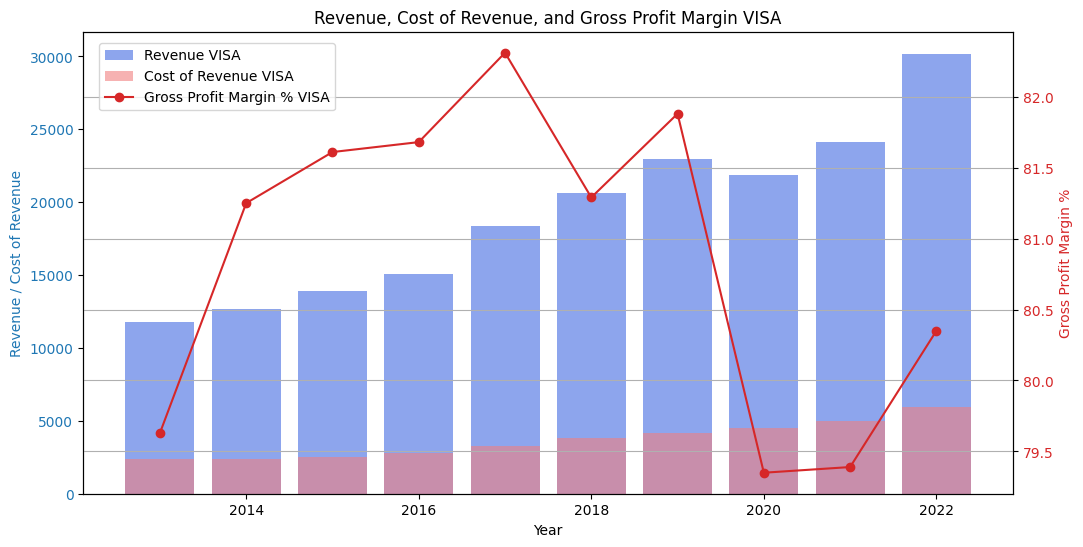

In [100]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Year')
ax1.set_ylabel('Revenue / Cost of Revenue', color='tab:blue')
ax1.bar(V_income_statement.columns[1:], revenue_V, color='royalblue', label='Revenue VISA', alpha=0.6)
ax1.bar(V_income_statement.columns[1:], cost_of_revenue_V, color='lightcoral', label='Cost of Revenue VISA', alpha=0.6)
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Gross Profit Margin %', color='tab:red')
ax2.plot(V_income_statement.columns[1:], gross_profit_margin_V, color='tab:red', marker='o', label='Gross Profit Margin % VISA')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Revenue, Cost of Revenue, and Gross Profit Margin VISA')
ax1.set_xlabel('Year')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(0.01, 0.99))

plt.grid(True)
plt.show()

In [104]:
net_income_V = V_income_statement.iloc[18, 1:]
net_income_V = pd.to_numeric(net_income_V, errors='coerce')
operating_margin_V = V_income_statement.iloc[8, 1:]
operating_margin_V = pd.to_numeric(operating_margin_V, errors='coerce')

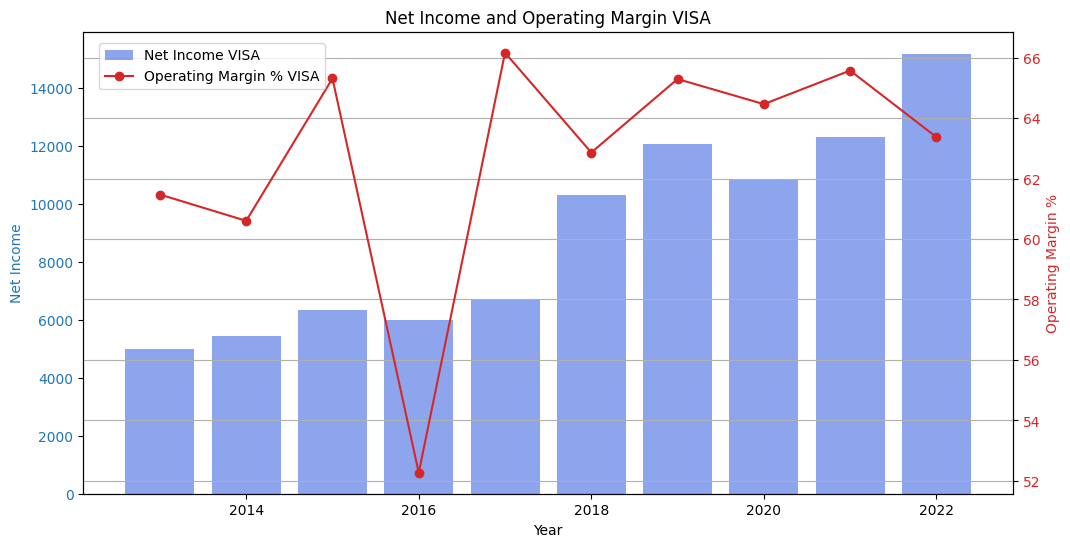

In [105]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Year')
ax1.set_ylabel('Net Income', color='tab:blue')
ax1.bar(V_income_statement.columns[1:], net_income_V, color='royalblue', label='Net Income VISA', alpha=0.6)
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Operating Margin %', color='tab:red')
ax2.plot(V_income_statement.columns[1:], operating_margin_V, color='tab:red', marker='o', label='Operating Margin % VISA')
ax2.tick_params(axis='y', labelcolor='tab:red')


plt.title('Net Income and Operating Margin VISA')
ax1.set_xlabel('Year')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(0.01, 0.99))

plt.grid(True)
plt.show()

In [97]:
display(pd.DataFrame(MA_income_statement))

,Unnamed: 0,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013
0,Revenue,22237.00,18884.00,15301.00,16883.00,14950.00,12497.00,10776.00,9667.00,9473.00,8346.00
1,Cost Of Revenue,5263.00,4489.00,3787.00,3537.00,3214.00,2687.00,2225.00,2105.00,2064.00,1739.00
2,Gross Profit,16974.00,14395.00,11514.00,13346.00,11736.00,9810.00,8551.00,7562.00,7409.00,6607.00
3,Gross Profit Margin %,76.34,76.23,75.25,79.05,78.51,78.50,79.36,78.23,78.22,79.17
4,Operating Expenses,9617.00,8708.00,7147.00,7219.00,6540.00,5860.00,4898.00,4528.00,4367.00,3748.00
5,Selling General And Administrative Expense,8078.00,7087.00,5910.00,5763.00,5174.00,4526.00,3714.00,3341.00,3184.00,2649.00
6,Depreciation And Amortization,1129.00,726.00,580.00,522.00,459.00,436.00,373.00,366.00,321.00,258.00
7,Operating Income/Loss,12264.00,10082.00,8081.00,9664.00,7282.00,6622.00,5761.00,5078.00,5106.00,4503.00
8,Operating Margin %,55.16,53.39,52.82,57.25,48.71,52.99,53.47,52.53,53.91,53.96
9,Nonoperating Income Expense,-61.00,656.00,59.00,291.00,108.00,54.00,-20.00,-59.00,21.00,11.00


In [99]:
revenue_MA = MA_income_statement.iloc[0, 1:]
cost_of_revenue_MA = MA_income_statement.iloc[1, 1:]
gross_profit_margin_MA = MA_income_statement.iloc[3, 1:]
revenue_MA = pd.to_numeric(revenue_MA, errors='coerce')
cost_of_revenue_MA = pd.to_numeric(cost_of_revenue_MA, errors='coerce')
gross_profit_margin_MA = pd.to_numeric(gross_profit_margin_MA, errors='coerce')

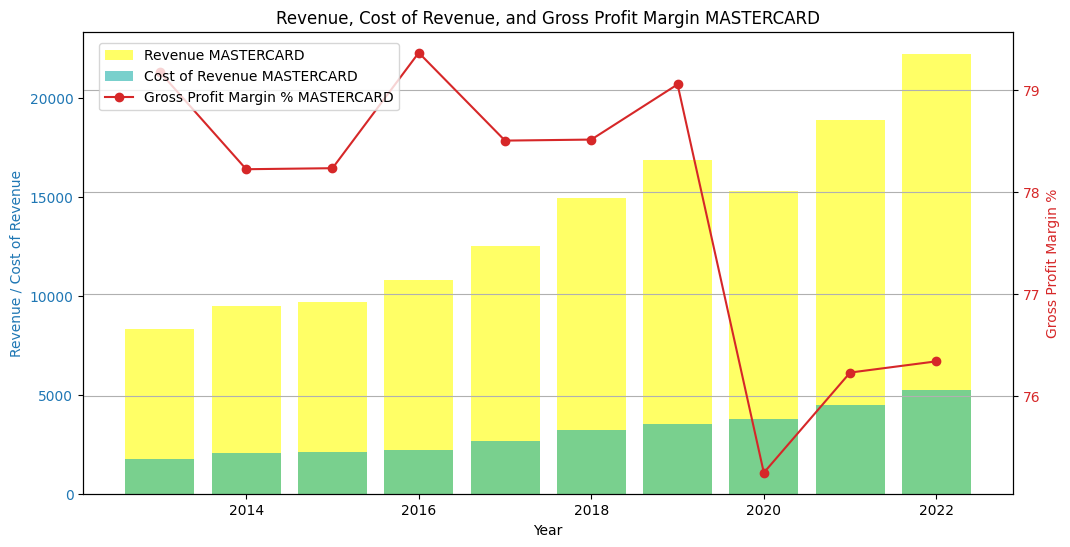

In [101]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Year')
ax1.set_ylabel('Revenue / Cost of Revenue', color='tab:blue')
ax1.bar(MA_income_statement.columns[1:], revenue_MA, color='yellow', label='Revenue MASTERCARD', alpha=0.6)
ax1.bar(MA_income_statement.columns[1:], cost_of_revenue_MA, color='lightseagreen', label='Cost of Revenue MASTERCARD', alpha=0.6)
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Gross Profit Margin %', color='tab:red')
ax2.plot(MA_income_statement.columns[1:], gross_profit_margin_MA, color='tab:red', marker='o', label='Gross Profit Margin % MASTERCARD')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Revenue, Cost of Revenue, and Gross Profit Margin MASTERCARD')
ax1.set_xlabel('Year')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(0.01, 0.99))

plt.grid(True)
plt.show()

In [107]:
initial_revenue_V = revenue_V.iloc[-1]
final_revenue_V = revenue_V.iloc[0]
percentage_revenue_increase_V = ((final_revenue_V - initial_revenue_V) / initial_revenue_V) * 100

initial_revenue_MA = revenue_MA.iloc[-1]
final_revenue_MA = revenue_MA.iloc[0]
percentage_revenue_increase_MA = ((final_revenue_MA - initial_revenue_MA) / initial_revenue_MA) * 100

print(f'Percentage Increase in Visa Revenue: {percentage_revenue_increase_V:.2f}%')
print(f'Percentage Increase in Mastercard Revenue: {percentage_revenue_increase_MA:.2f}%')

Percentage Increase in Visa Revenue: 156.30%
Percentage Increase in Mastercard Revenue: 166.44%


In [103]:
net_income_MA = MA_income_statement.iloc[20, 1:]
net_income_MA = pd.to_numeric(net_income_MA, errors='coerce')
operating_margin_MA = MA_income_statement.iloc[8, 1:]
operating_margin_MA = pd.to_numeric(operating_margin_MA, errors='coerce')

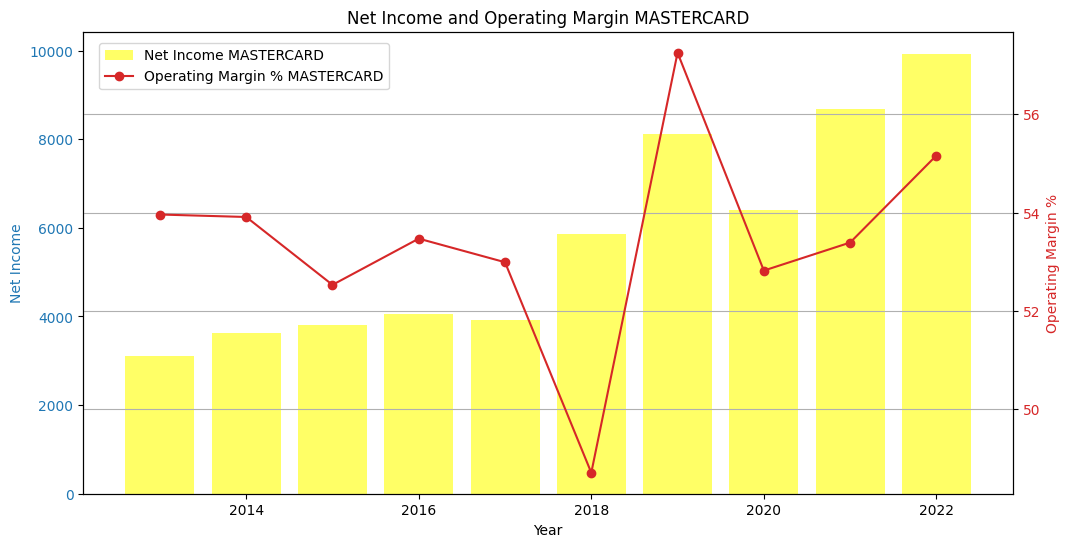

In [106]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Year')
ax1.set_ylabel('Net Income', color='tab:blue')
ax1.bar(MA_income_statement.columns[1:], net_income_MA, color='yellow', label='Net Income MASTERCARD', alpha=0.6)
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Operating Margin %', color='tab:red')
ax2.plot(MA_income_statement.columns[1:], operating_margin_MA, color='tab:red', marker='o', label='Operating Margin % MASTERCARD')
ax2.tick_params(axis='y', labelcolor='tab:red')


plt.title('Net Income and Operating Margin MASTERCARD')
ax1.set_xlabel('Year')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(0.01, 0.99))

plt.grid(True)
plt.show()

In [108]:
initial_net_income_V = net_income_V.iloc[-1]
final_net_income_V = net_income_V.iloc[0]
percentage_net_income_increase_V = ((final_net_income_V - initial_net_income_V) / initial_net_income_V) * 100

initial_net_income_MA = net_income_MA.iloc[-1]
final_net_income_MA = net_income_MA.iloc[0]
percentage_net_income_increase_MA = ((final_net_income_MA - initial_net_income_MA) / initial_net_income_MA) * 100

print(f'Percentage Increase in Visa Revenue: {percentage_net_income_increase_V:.2f}%')
print(f'Percentage Increase in Mastercard Revenue: {percentage_net_income_increase_MA:.2f}%')

Percentage Increase in Visa Revenue: 204.76%
Percentage Increase in Mastercard Revenue: 218.68%


In [109]:
interest_V = V_income_statement.iloc[10, 1:]
interest_V = pd.to_numeric(interest_V, errors='coerce')

interest_MA = MA_income_statement.iloc[10, 1:]
interest_MA = pd.to_numeric(interest_MA, errors='coerce')

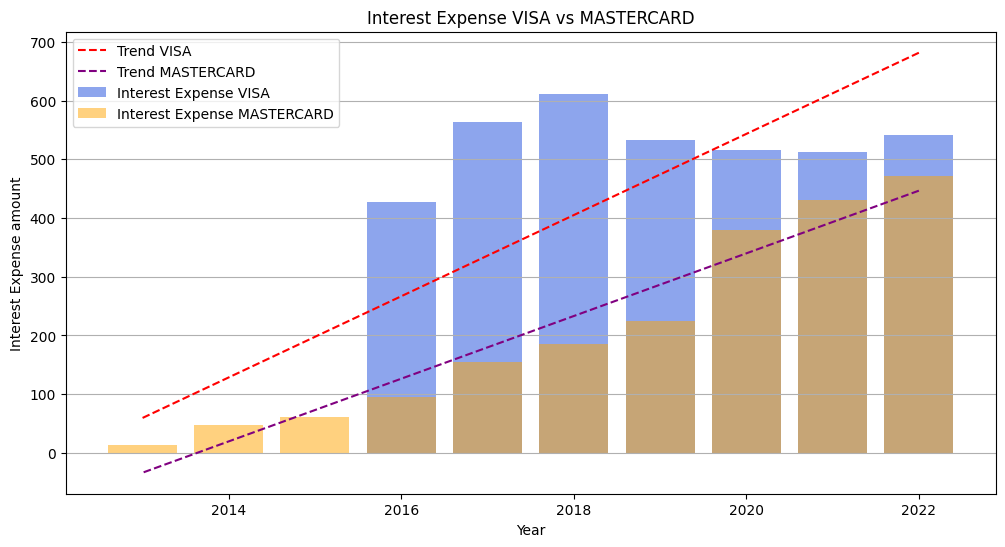

In [114]:
plt.figure(figsize=(12, 6))
plt.bar(V_income_statement.columns[1:], interest_V, color='royalblue', label='Interest Expense VISA',alpha=0.6)
plt.bar(MA_income_statement.columns[1:], interest_MA, color='orange', label='Interest Expense MASTERCARD',alpha=0.5)

X1 = np.array(range(len(interest_V))).reshape(-1, 1)
y1 = interest_V.values
reg1 = LinearRegression().fit(X1, y1)
trendline1 = reg1.predict(X1)

X2 = np.array(range(len(interest_MA))).reshape(-1, 1)
y2 = interest_MA.values
reg2 = LinearRegression().fit(X2, y2)
trendline2 = reg2.predict(X2)

plt.plot(V_income_statement.columns[1:], trendline1, color='red', linestyle='--', label='Trend VISA')
plt.plot(MA_income_statement.columns[1:], trendline2, color='purple', linestyle='--', label='Trend MASTERCARD')


plt.title('Interest Expense VISA vs MASTERCARD')
plt.xlabel('Year')
plt.ylabel('Interest Expense amount')
plt.grid(axis='y')
plt.legend()
plt.show()

In [120]:
initial_interest_V = interest_V.iloc[6]
final_interest_V = interest_V.iloc[0]
percentage_interest_increase_V = ((final_interest_V - initial_interest_V) / initial_interest_V) * 100

initial_interest_MA = interest_MA.iloc[-1]
final_interest_MA = interest_MA.iloc[0]
percentage_interest_increase_MA = ((final_interest_MA - initial_interest_MA) / initial_interest_MA) * 100

print(f'Percentage Increase in Visa Revenue: {percentage_interest_increase_V:.2f}%')
print(f'Percentage Increase in Mastercard Revenue: {percentage_interest_increase_MA:.2f}%')

Percentage Increase in Visa Revenue: 26.70%
Percentage Increase in Mastercard Revenue: 3264.29%


14.0
